# Basic Concepts

## Eigenvalue and Eigenvector calculation

In [1]:
import numpy as np

B = np.array([[-13, -8, -4],[12, 7, 4],[24, 16, 7]])

# Calculate eigenvalues and Q
Eigv, Q = np.linalg.eig(B)

print("Eigenvalues:" )
print(Eigv)
print("Eigenvectors:")
print(Q)

Eigenvalues:
[ 3. -1. -1.]
Eigenvectors:
[[ 0.40824829  0.57158286  0.15048813]
 [-0.40824829 -0.55534639  0.25221658]
 [-0.81649658 -0.6040558  -0.95589755]]


## Gradient Decent

set [1,1] as the starting point


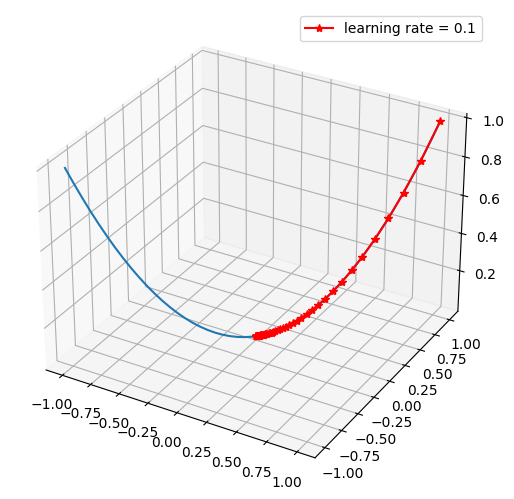

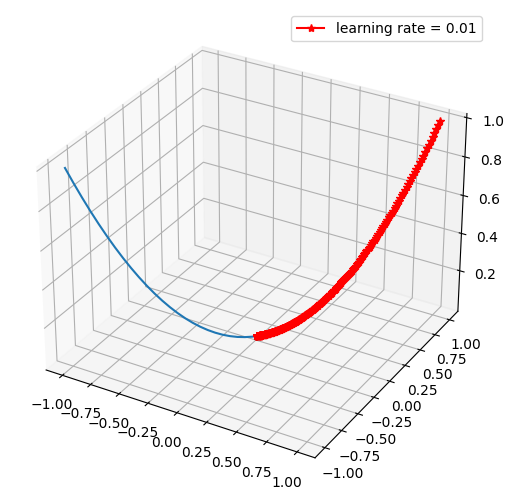

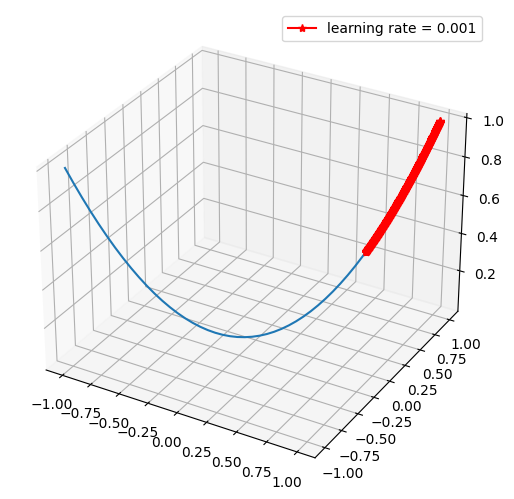

In [2]:
import math
import numpy as np


def func_2d(x):
    #objective function: x**2 + y**2 + x*y
    return x[0] ** 2 + x[1] ** 2 - x[0]*x[1]


def grad_2d(x):
    #gradient of the function
    deriv0 = 2 * x[0] - x[1]
    deriv1 = 2 * x[1] -x[0]
    return np.array([deriv0, deriv1])


def gradient_descent_2d(grad, cur_x, learning_rate, precision, max_iters,history_x):

    for i in range(max_iters):
        grad_cur = grad(cur_x)
        history_x.append(cur_x)
        last_x = cur_x
        cur_x = cur_x - grad_cur * learning_rate
        if abs(func_2d(last_x)-func_2d(cur_x)) < precision:
            break 
    return history_x


print(f"set [1,1] as the starting point")

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot(gradient,lr,i):
    fig = plt.figure(figsize=(21,18))
    ax = fig.add_subplot(1,3,i+1,projection='3d')
    xd = np.linspace(-1,1)
    yd = np.linspace(-1,1)
    zd = xd ** 2 + yd ** 2- xd*yd
    x0 = np.array(gradient)[:,0]
    x1 = np.array(gradient)[:,1]
    z = x0 ** 2 + x1 ** 2-x0*x1
    ax.plot3D(xd,yd,zd)
    ax.plot3D(x0,x1,z,color='r',marker='*',label = 'learning rate = '+str(lr[i])) 
    ax.legend()

lr = [0.1, 0.01, 0.001]
for i in range (3):
    gradient = gradient_descent_2d(grad_2d, cur_x=np.array([1,1]), learning_rate = lr[i], 
                        precision=0.000001, max_iters=500,history_x=[])
    plot(gradient,lr,i)
    plt.show()